In [127]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import math

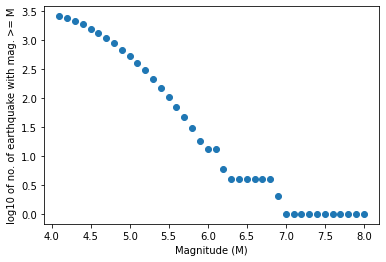

In [132]:
earthquake_data = pd.read_csv('E:\Courses\Year 3 Msc. Maths + BE EEE\Semester-2\Applied Statistical Methods\Assignment\Dataset_Taiwan.csv')

magnitudes = list(earthquake_data["Mag"])
x = [round(i,1) for i in np.arange(8, 4, -0.1)]
magGreaterThanM = dict.fromkeys(x, 0)
for i in x:
    after = magnitudes.count(i)
    magGreaterThanM[i] += after
    if i<6:
        magGreaterThanM[i] += magGreaterThanM[round(i+0.1, 2)]

for i in magGreaterThanM.keys():
    if magGreaterThanM[i] > 0:
        magGreaterThanM[i] = math.log10(magGreaterThanM[i])
for i in magGreaterThanM.keys():
    if i!=8 and magGreaterThanM[i]<=magGreaterThanM[round(i+0.1, 2)]:
        magGreaterThanM[i] = magGreaterThanM[round(i+0.1, 2)]
plt.scatter(x, magGreaterThanM.values())
plt.ylabel("log10 of no. of earthquake with mag. >= M")
plt.xlabel("Magnitude (M)")
plt.show()

In [120]:
frequency = []
interCount = 0
ind = []
for i in range(len(magnitudes)):
    if interCount == 0 and magnitudes[i] < 6:
        interCount += 1
    elif interCount > 0:
        if magnitudes[i] < 6:
            interCount += 1
        else:
            frequency.append(interCount)
            interCount = 0
            ind.append(i)
x = frequency.pop(0)


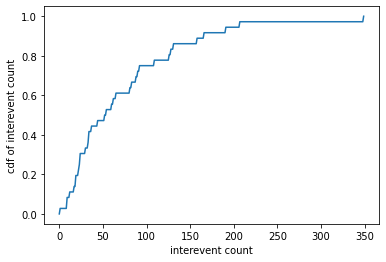

In [121]:
cdfs = []
for i in range(350):
    cdfs.append(frequency.count(i)/len(frequency))
    if(i>0):
        cdfs[i] += cdfs[i-1]
values = list(range(350))
plt.plot(values, cdfs)
plt.ylabel("cdf of interevent count")
plt.xlabel("interevent count")
plt.show()S


In [122]:
def distance(lat1, long1, lat2, long2):
    lat1 = math.radians(lat1)
    lat2 = math.radians(lat2)
    long1 = math.radians(long1)
    long2 = math.radians(long2)
    dist = 6371.01 * math.acos(math.sin(lat1)*math.sin(lat2) + math.cos(lat1)*math.cos(lat2)*math.cos(long2 - long1))
    return dist

In [123]:
def findLastCount(lati, longi, earthquake_data):
    data = list()
    [date, time, lat, long, depth, mag] = earthquake_data.items()
    for i in range(len(lat[1])):
        if distance(lati, longi, lat[1][i], long[1][i]) < 200:
            data.append(mag[1][i])
    lastCount = 0
    for i in range(len(data)):
        if data[i] > 6:
            lastCount = 0
        else:
            lastCount += 1
    return lastCount

In [124]:
lastCount = findLastCount(25.0330, 121.5654, earthquake_data)
print(lastCount)
lastCount = findLastCount(22.9997, 120.2270, earthquake_data)
print(lastCount)


48
61
